# **Multiple_Linear_Regression_Bike_Sharing_Assignment**

**Problem Statement:**

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**The company wants to know:**

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

**Goal:**

Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## **Step1: Importing Libraries**

In [290]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

## **Step2: Reading and Understanding the Data**

In [291]:
bikeshare_df = pd.read_csv('/content/sample_data/day.csv')

In [292]:
bikeshare_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [293]:
#check the shape
bikeshare_df.shape

(730, 16)

In [294]:
#check the null values and datatypes
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [295]:
#check the details of the numerical data
bikeshare_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [296]:
#check the columns of the data
bikeshare_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [297]:
#check the size of the data
bikeshare_df.size

11680

In [298]:
#check the datatypes of the data
bikeshare_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [299]:
#check for the dimensions of the dataframe
bikeshare_df.ndim

2

In [300]:
#Check for values of the data
bikeshare_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

**Observation:**

There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.



## **Step3: Data Cleaning**


### **3.1 Dropping Unwanted Columns**
* instant is record index and it just identifies rows and doesn't hold any relevance for our analysis and modeling
* casual and registered variables are not needed for prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.
* dteday has date which can be compensated by year and month column and also for this analysis we will not consider day to day trend in demand for bikes.
* Also we will introduce a new column `days_old` which indicated how old is the business



In [301]:
# dropping the columns
bikeshare_df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace=True)

In [302]:
#inspect dataframe after dropping
bikeshare_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [303]:
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [304]:
bikeshare_df.season.value_counts()

,count
season,
3,188
2,184
1,180
4,178


In [305]:
bikeshare_df.weathersit.value_counts()

,count
weathersit,
1,463
2,246
3,21


In [306]:
bikeshare_df.mnth.value_counts()

,count
mnth,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


In [307]:
bikeshare_df.weekday.value_counts()

,count
weekday,
6,105
0,105
1,105
2,104
4,104
5,104
3,103


* As we can see, the variables mnth, weekday, season and weathersit are integers but they should be non-numerical categories

### **3.2 Handling missing values**
  As we have already seen that there are no missing values, we will verify again

In [308]:
# Finding null counts column-wise
bikeshare_df.isnull().sum()

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0


**Observation:**
  There are no missing values

### **3.2 Handling outliers**

In [309]:
# Let us see what are the columns
bikeshare_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [310]:
# Check the number of unique values for each column
bikeshare_df.nunique()

,0
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,498
atemp,689
hum,594


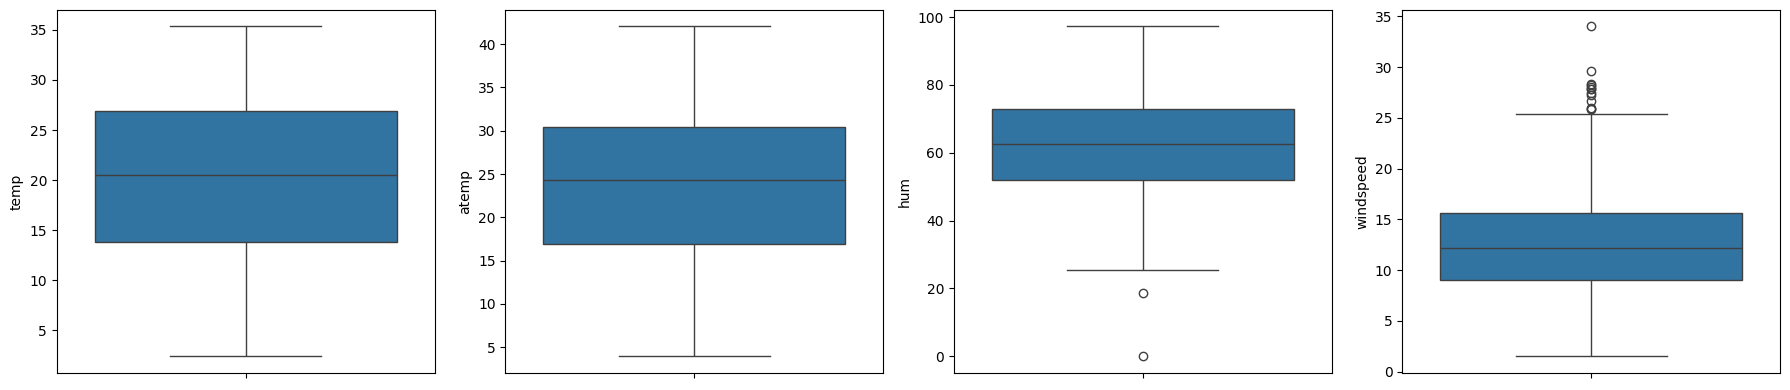

In [311]:
# Drawing boxplots for continuous independent variables to identify outliers
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize = (18, 4))

for col in cols:
  plt.subplot(1, 4, cols.index(col)+1)
  sns.boxplot(y=col, data=bikeshare_df)
  plt.tight_layout()

**Observation:**
From the above plots, we can see there are no outliers to be handled in the dataset and we are good to go.

## **Step4: EDA**

### **4.1 Convert season, weathersit, mnth and weekday to categorical types**

In [312]:
bikeshare_df.season.replace({1: "spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
bikeshare_df.weathersit.replace({1: "clear", 2: "cloudy", 3: "lightsnow", 4: "heavy rain"}, inplace=True)
bikeshare_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace=True)
bikeshare_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace=True)
bikeshare_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### **4.2 Draw PairPlots to identify any Linear relationship between variables**

<Figure size 1500x3000 with 0 Axes>

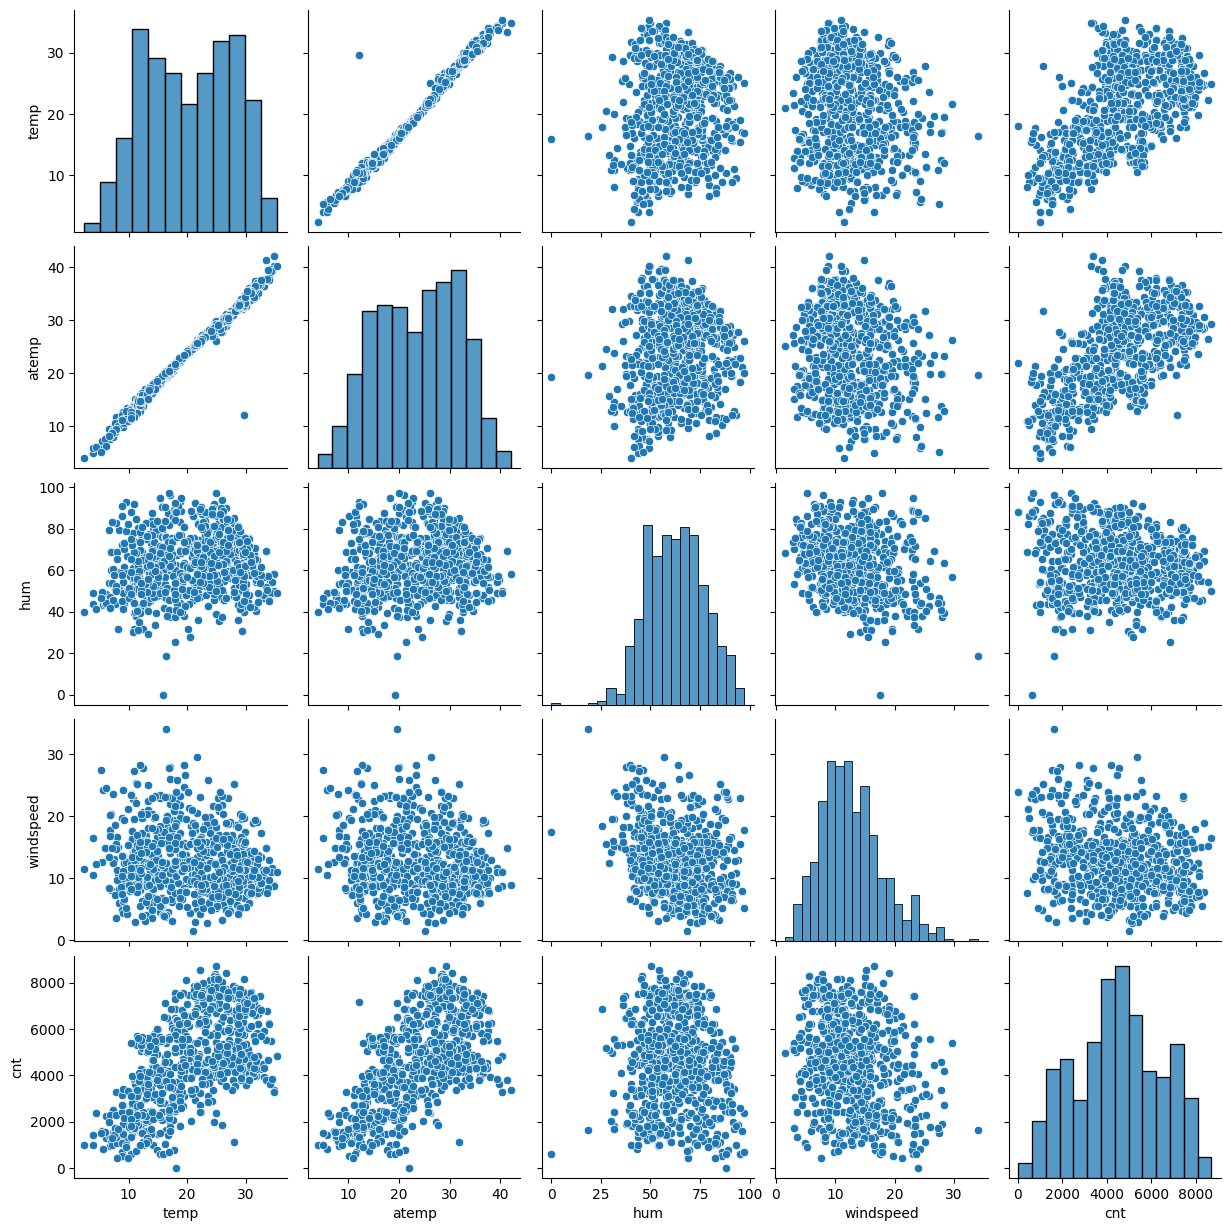

In [313]:
# Draw pairplot between continuous numeric variables using seaborn
plt.figure(figsize =(15, 30))
sns.pairplot(data=bikeshare_df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

**Observation:**
1. Variables temp and atemp has the highest correlation with target variable cnt
2. temp and atemp has linear relationship with cnt variable
3. temp and atemp also have highest correlation with each other

### **4.3 Visualizing data to check for the correlation between numeric variables**

<Figure size 2000x1500 with 0 Axes>

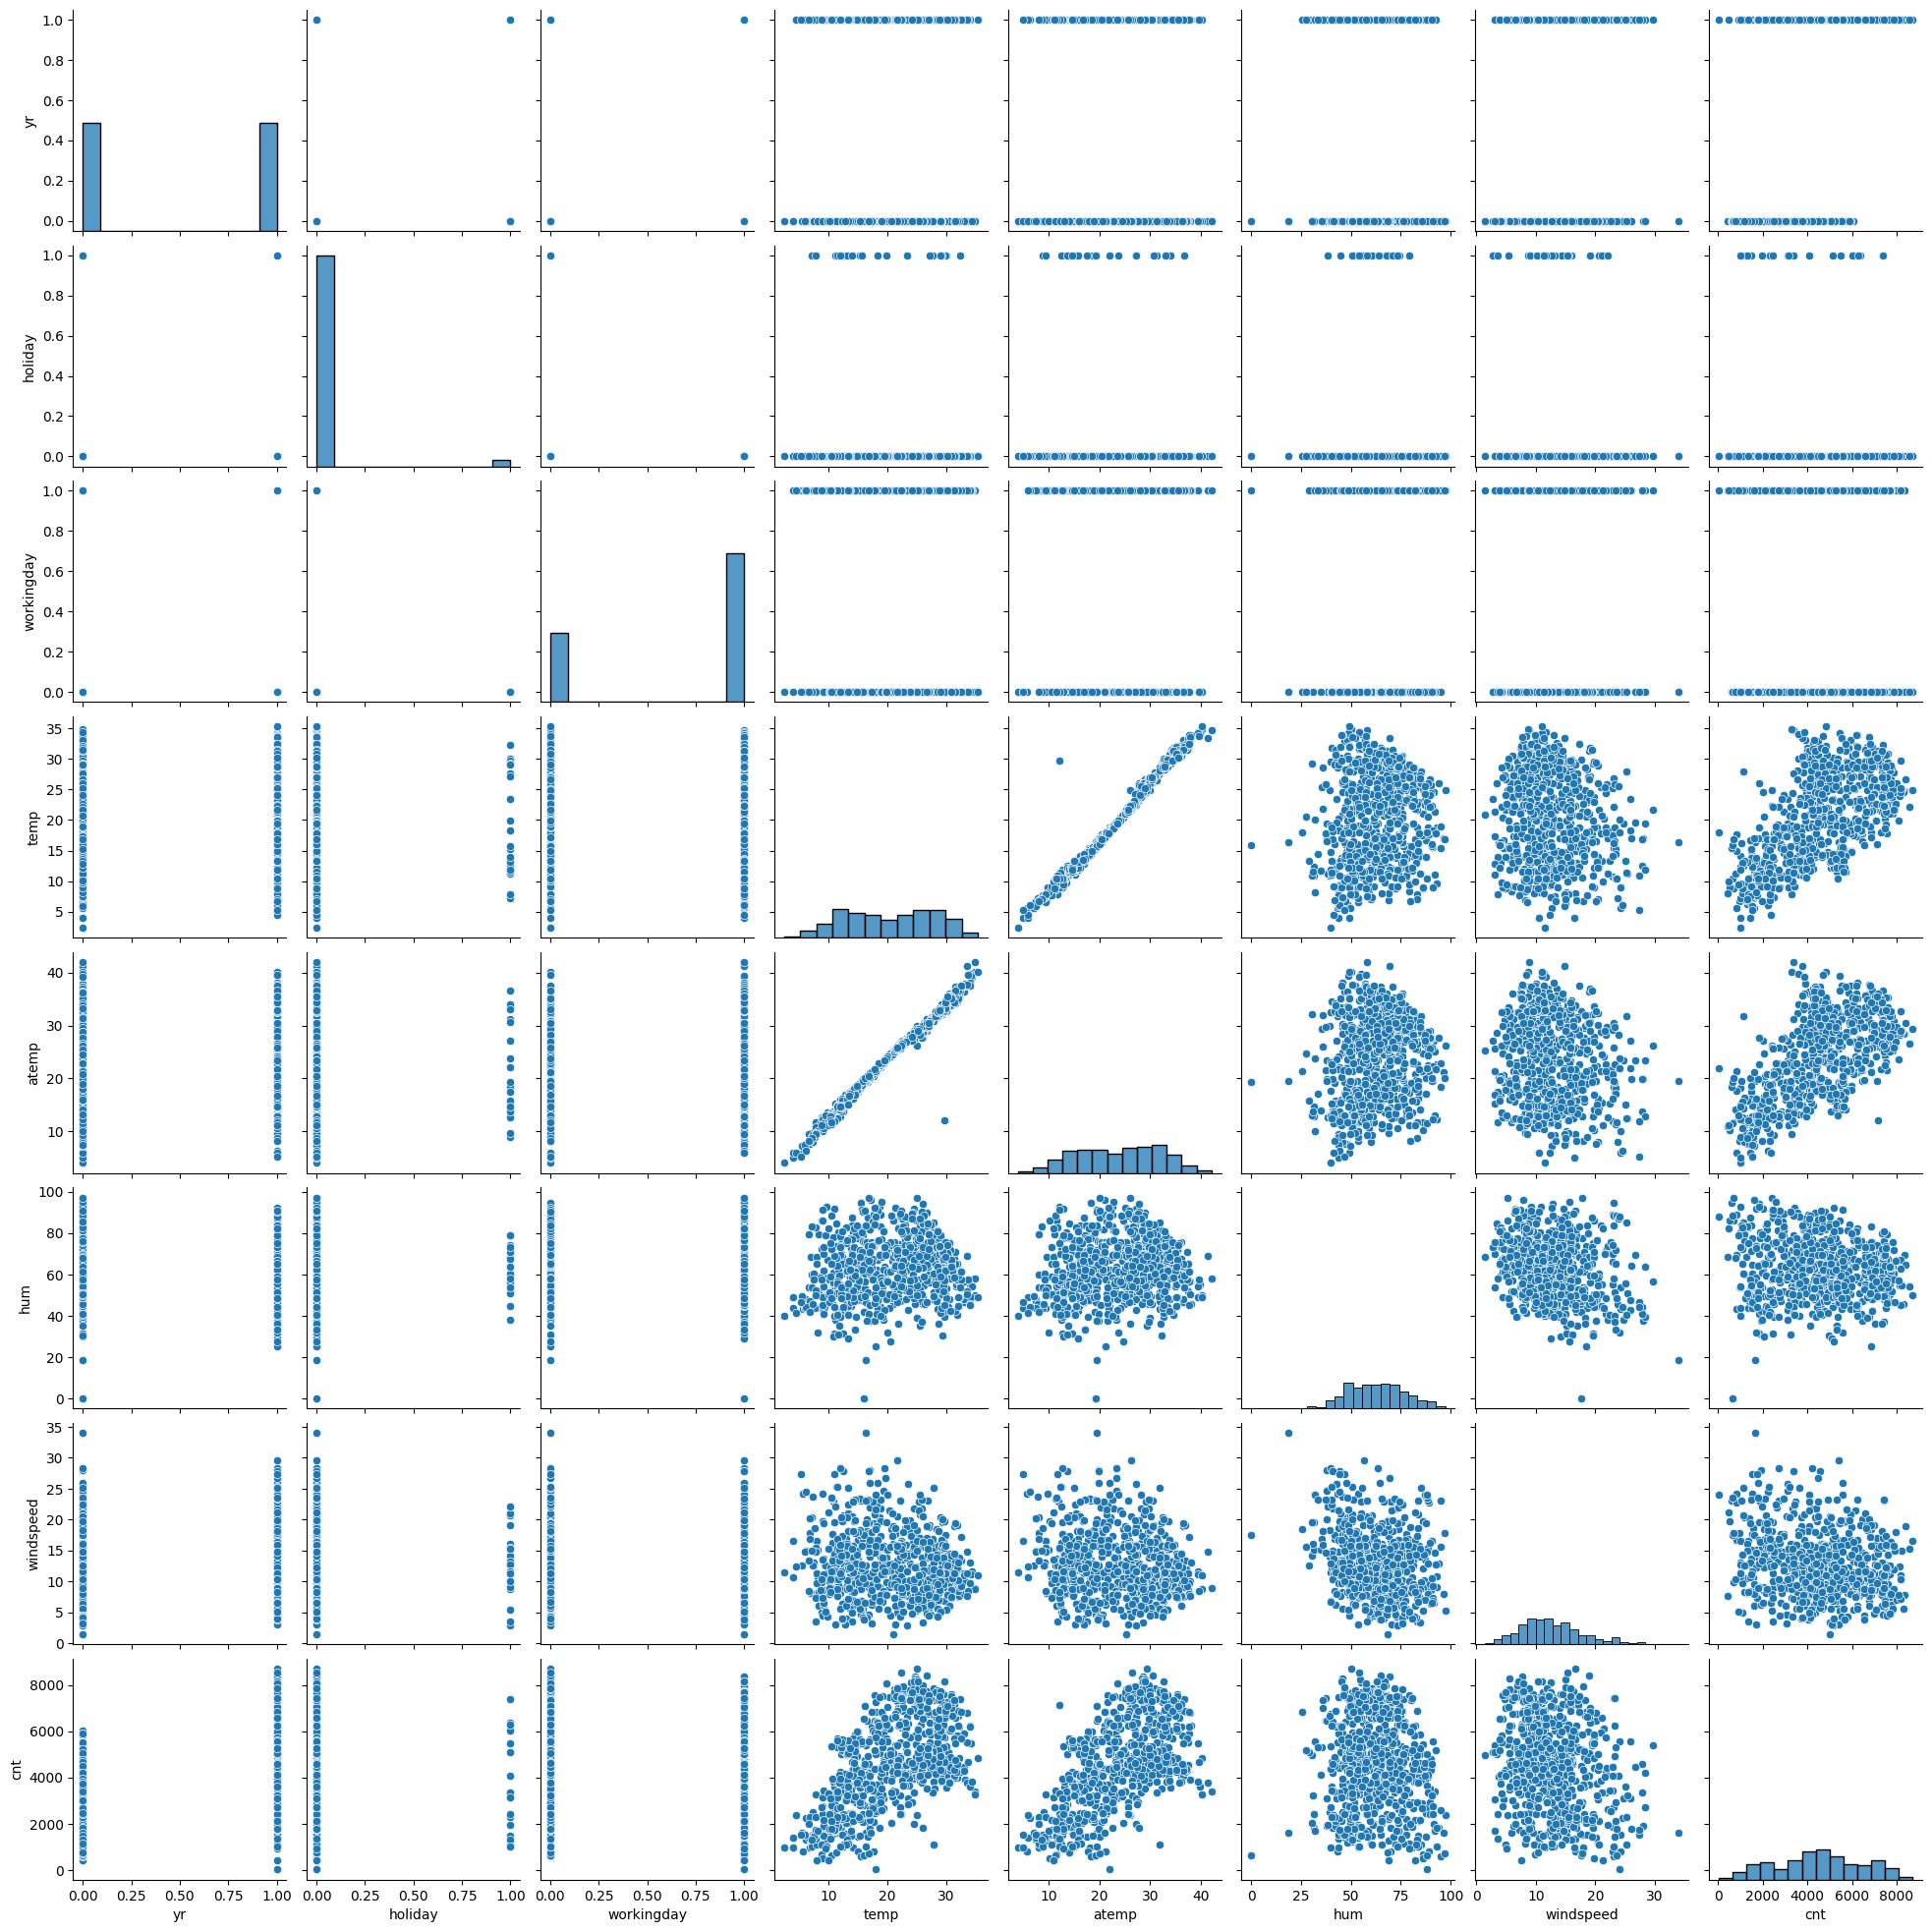

In [314]:
plt.figure(figsize=(20, 15))
sns.pairplot(bikeshare_df)
plt.show()

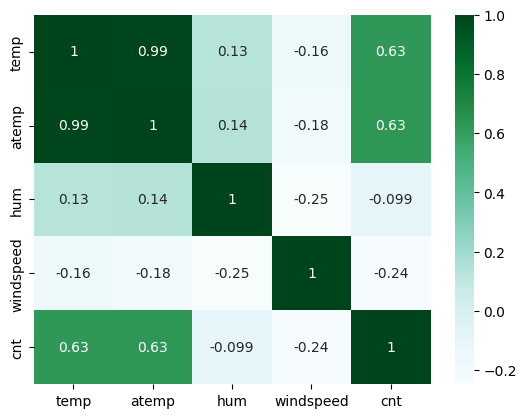

In [315]:
# checking for the relationship between continuous variables with each other
sns.heatmap(bikeshare_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), cmap='BuGn', annot=True)
plt.show()

**Observation:**

Here, we can see that temp and atemp has correlation more than .99 that is almost 1 (highly correlated) and atemp seems to be derived from temp. Hence, we can consider dropping atemp field later based on Variance Inflation Factor

### **4.4 Draw Heatmap of correlation between variables**

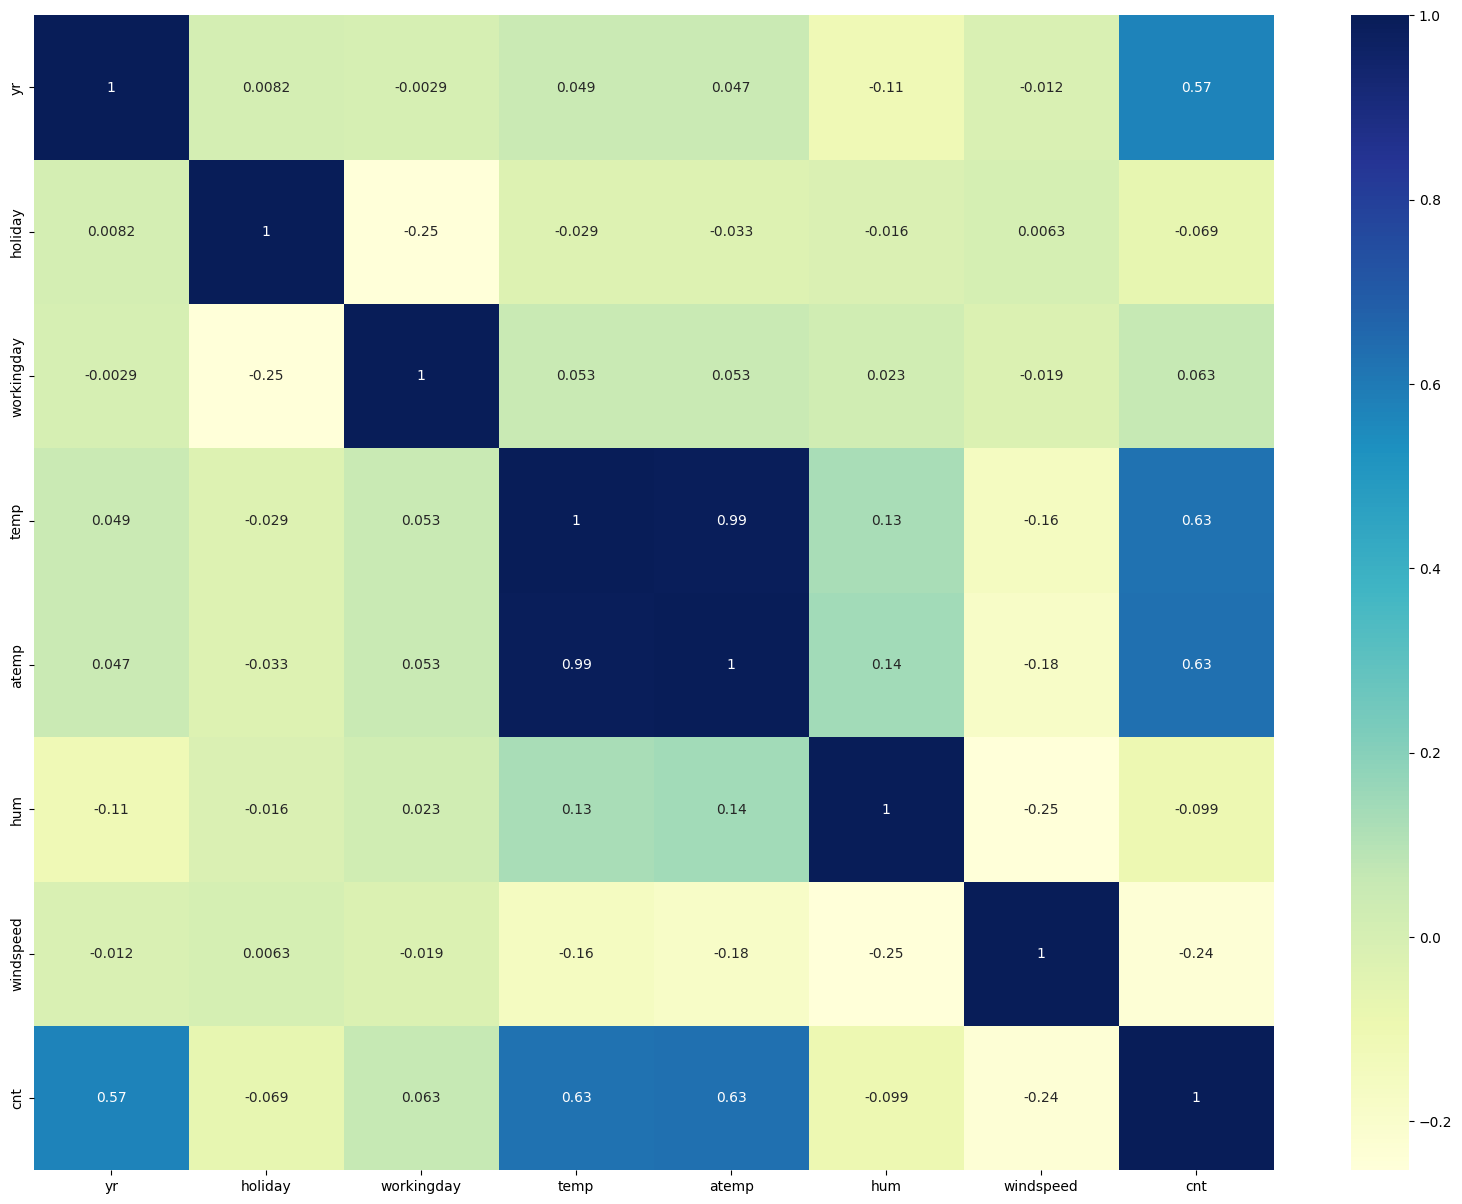

In [316]:
# Select only numeric columns for correlation
numeric_bikeshare_df = bikeshare_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr = numeric_bikeshare_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.show()

**Observation:**

 In the correlation map, temp, atemp and days_old seems to be highly correlated. However, let us elminate it based on the Variance Inflation Factor later during the model building.


 We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

### **4.5 Analysing Categorical Variable accross target variable to see the trend**

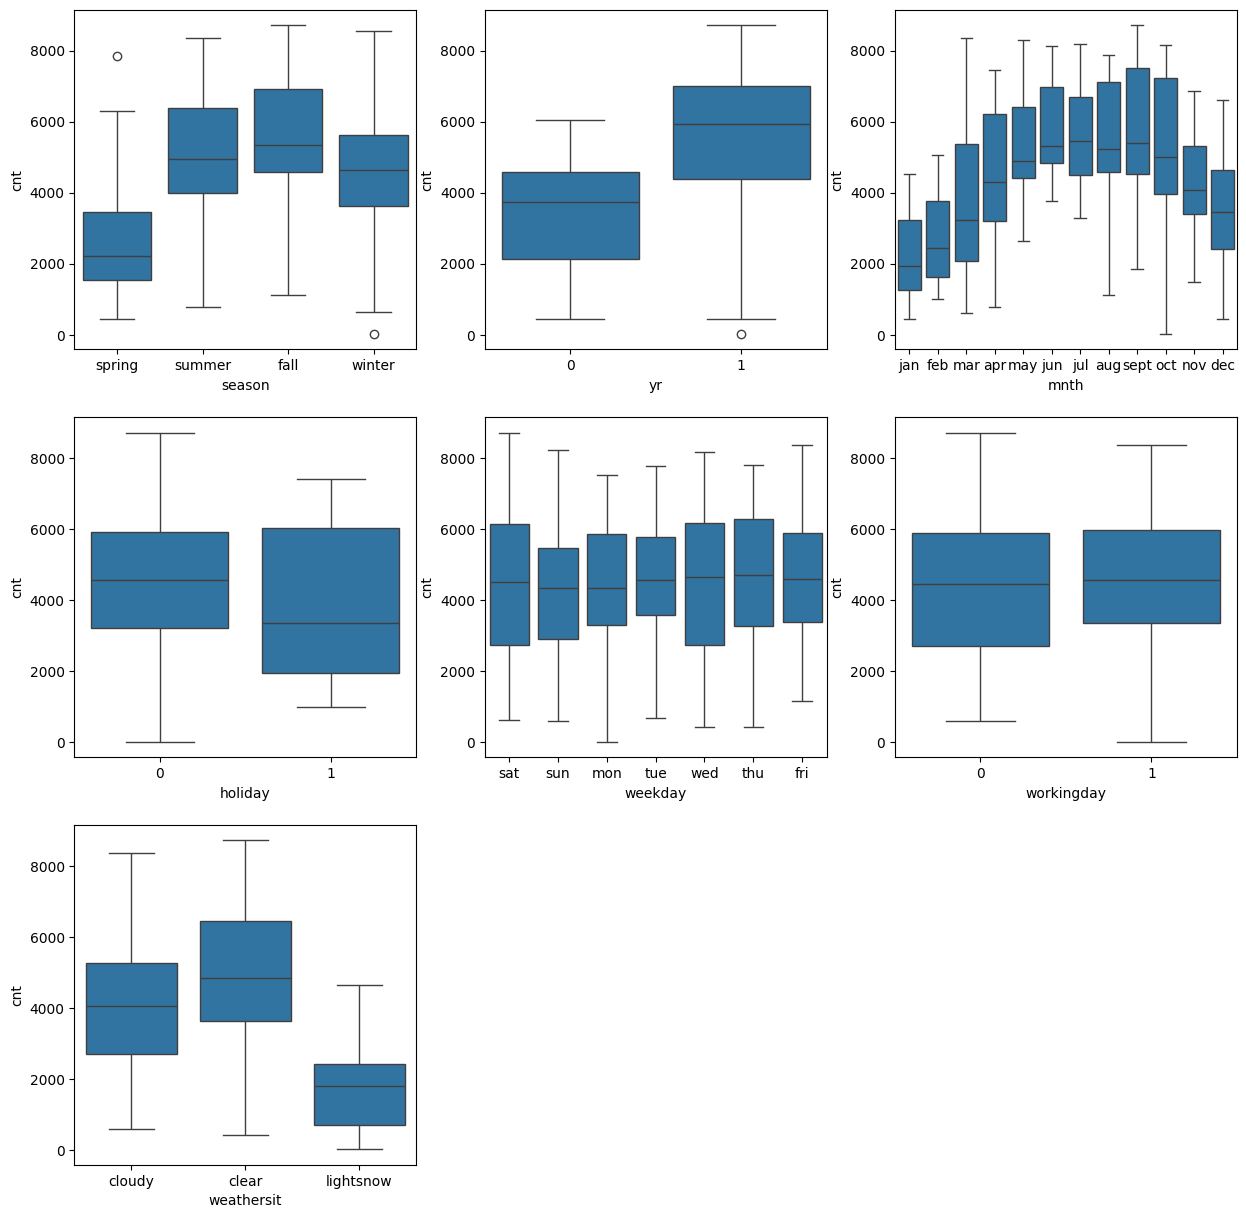

In [317]:
# Boxplot for categorical variables to see demands
categorical_variables = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(categorical_variables):
  plt.subplot(3, 3, i[0]+1)
  sns.boxplot(x=i[1], y='cnt', data=bikeshare_df)

plt.show()

**Observations:**



1. Season: fall (3) has highest demand for rental bikes
2. Demand has grown in next year
3. Demand is continuously growing until June. Sept has highest demand. After Sept, demand started decreasing
4. Demand is decreased on holidays
5. Weekday and working day is not giving any clear picture about demand
6. Weathersit clear has highest demand



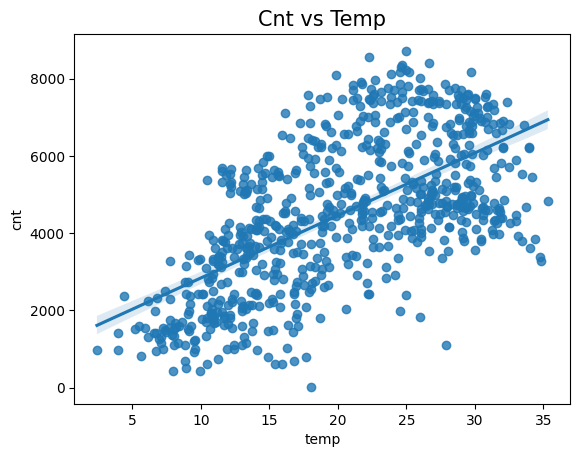

In [318]:
plt.title("Cnt vs Temp", fontsize=15)
sns.regplot(x='temp', y='cnt', data=bikeshare_df)
plt.show()

**Observation:**

*  The demand for bikes is positively correlated with temp
*  Cnt is linearly increasing with temp indicating linear relationship between them



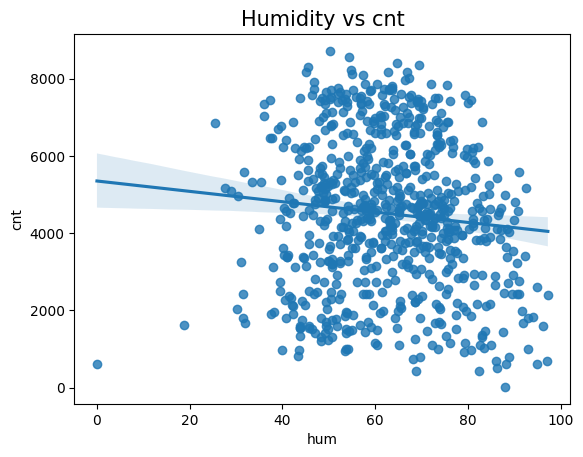

In [319]:
plt.title("Humidity vs cnt", fontsize=15)
sns.regplot(x='hum', y='cnt', data=bikeshare_df)
plt.show()

**Observation:**

Humidity values are more scattered. However, we can see demand is decreasing with increase in humidity

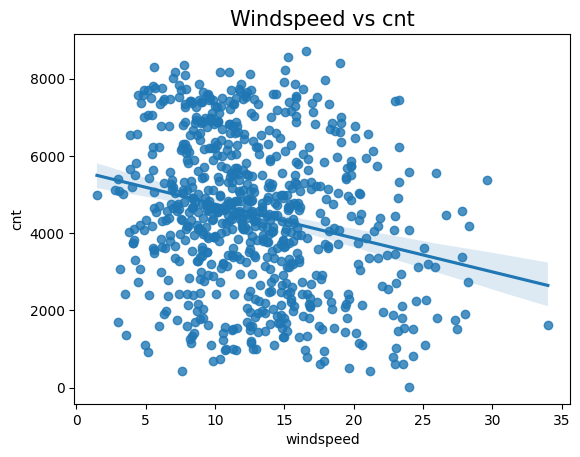

In [320]:
plt.title("Windspeed vs cnt", fontsize=15)
sns.regplot(x='windspeed', y='cnt', data=bikeshare_df)
plt.show()

**Observation:**

The values of variable windspeed are more scattered around. However, the cnt values/ demand is decreasing with increase in windspeed.

## **Step5: Data Preparation for Linear Regression**

### **5.1 Create dummy variables for all categorical variables**

In [321]:
bikeshare_df = pd.get_dummies(data = bikeshare_df, columns=["season", "mnth", "weekday"], drop_first=True, dtype=int)

**Note:**

Here we dropped first columns as (p-1) dummies can explain p categories

In [322]:
bikeshare_df = pd.get_dummies(data = bikeshare_df, columns=["weathersit"], drop_first=False, dtype=int)

**Note:**

In weathersit column, we didn't drop first column because we don't want to loose any information about severe weather situatoion

In [323]:
#Print columns after creating dummies
bikeshare_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_clear', 'weathersit_cloudy',
       'weathersit_lightsnow'],
      dtype='object')

In [324]:
#Print few rows to inspect
bikeshare_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_lightsnow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


## **Step 6: Model Building**

### **6.1 Split Data into training and test**

In [325]:
#Checking the shape before splitting
bikeshare_df.shape

(730, 31)

In [326]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeshare_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [327]:
# inspect independent variables
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_lightsnow
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,1,0,0,0,0,0,1,0


In [328]:
# Checking shape and size of train and test
print(df_train.shape)
print(df_test.shape)

(510, 31)
(219, 31)


### **6.2 Feature Scaling continuous variables**

**Purpose:**

The purpose is to make all the variables to same scale so that interpretation will be easy

The columns temp, atemp, hum, windspeed, days_old are continuous to be scaled

In [329]:
#Let us scale continuous variables
cont_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

#Use Normalization to scale these variables
scaler = MinMaxScaler()

#Fit and transform training set
df_train[cont_vars] = scaler.fit_transform(df_train[cont_vars])

In [330]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_lightsnow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [331]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_lightsnow
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,1,0


#### **Dividing into X and y for model building**

In [332]:
y_train = df_train.pop('cnt')
X_train = df_train

In [333]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_lightsnow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.243137,0.245098,0.24902,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.429398,0.430568,0.43287,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [334]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_lightsnow
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,1,0


### **6.3 Build a Model using RFE and Automated approach**

Use RFE to eliminate some columns

In [335]:
# Build a model using sklearn for RFE
lr = LinearRegression().fit(X_train,y_train)

# Cut down the number of features to 15 using automated approach
rfe = RFE(lr, n_features_to_select=15)

# Building a model
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [336]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 14),
 ('mnth_jan', False, 3),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 16),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 5),
 ('mnth_oct', False, 10),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 13),
 ('weathersit_clear', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_lightsnow', True, 1)]

### **6.4 Manual elimination**

#### **Function to build a model using statsmodel api**

In [337]:
# Function to build a model using statsmodel api. This function takes columns to be selected for model as a parameter
def build_model(cols):
  X_train_sm = sm.add_constant(X_train[cols])
  lm = sm.OLS(y_train, X_train_sm).fit()
  print(lm.summary())
  return lm

#### **Function to calculate VIF and print them**

In [338]:
# Function to calculate VIF and print them. This function takes columns for which VIF needs to be calculated as a parameter
def calculate_vif(cols):
  df = X_train[cols]
  vif = pd.DataFrame()
  vif['Features'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  print(vif.sort_values(by = "VIF", ascending=False))

In [339]:
# Print columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_clear', 'weathersit_cloudy',
       'weathersit_lightsnow'],
      dtype='object')

In [340]:
# Print columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [341]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_clear', 'weathersit_cloudy',
       'weathersit_lightsnow']]

In [342]:
X_train_rfe.shape

(510, 15)

#### **Looking for collinearity**

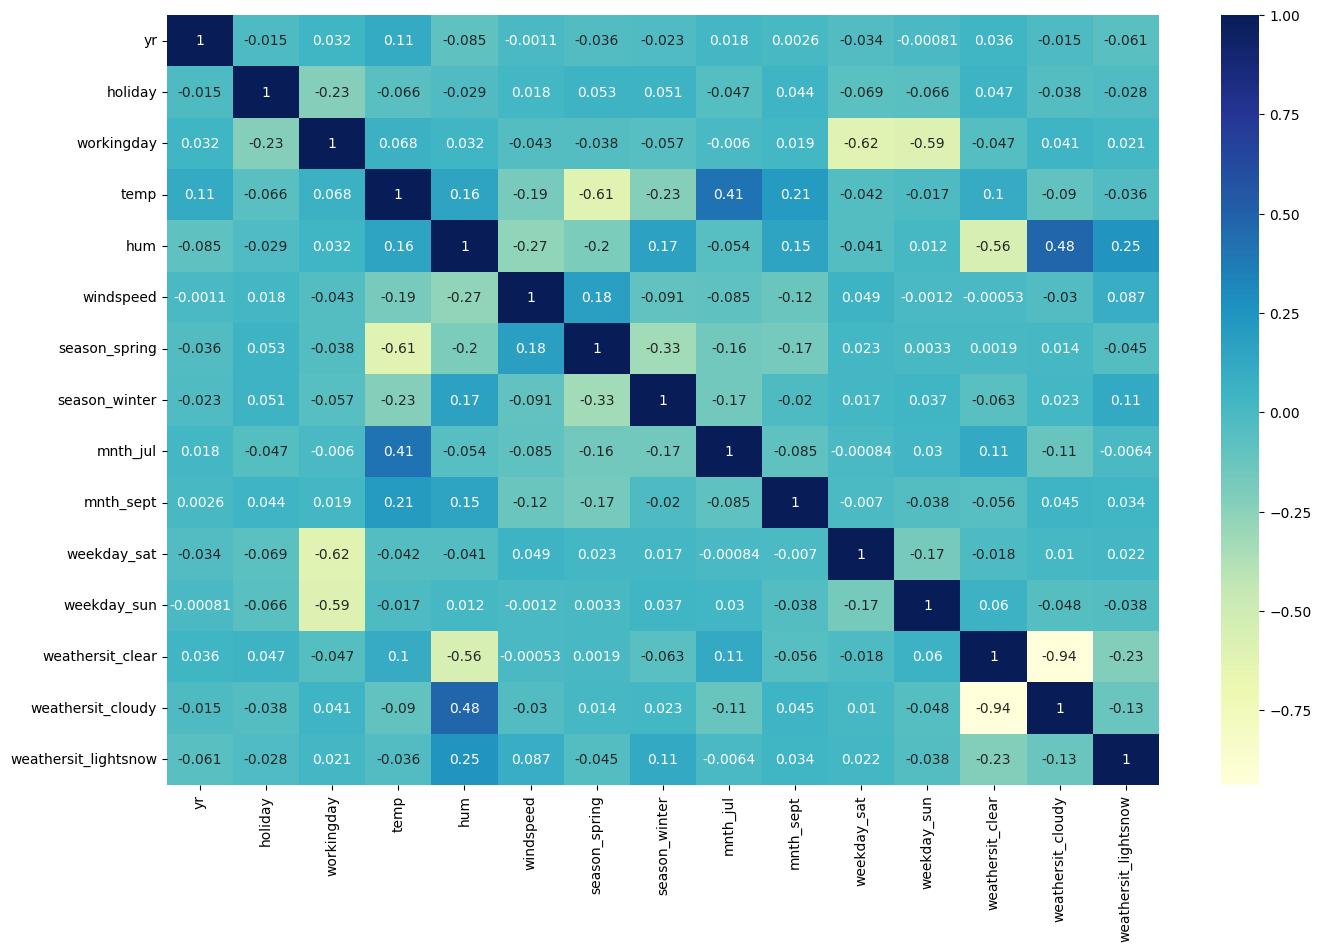

In [343]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_clear', 'weathersit_cloudy',
       'weathersit_lightsnow']].corr(),annot = True, cmap="YlGnBu")
plt.show()

### **6.5 Build Model**

#### **6.5.1 :Model 1 - Start with all variables selected by RFE**

In [344]:
# Selected columns for Model 1 - all columns selected by RFE
cols = [ 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_clear', 'weathersit_cloudy',
       'weathersit_lightsnow']

model1 = build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.81e-190
Time:                        15:06:44   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1255 

#### **6.5.2 :Model 2**

In [345]:
# Removing weekday_sat and weekday_sun as they explain holiday better
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_clear', 'weathersit_cloudy',
       'weathersit_lightsnow']

model2 = build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.39e-188
Time:                        15:06:44   Log-Likelihood:                 504.94
No. Observations:                 510   AIC:                            -983.9
Df Residuals:                     497   BIC:                            -928.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1693 

#### **6.5.3 :Model 3**

In [346]:
# Removing holiday as it has high p-value
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_clear', 'weathersit_cloudy',
       'weathersit_lightsnow']

model3 = build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.99e-187
Time:                        15:06:44   Log-Likelihood:                 499.37
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     498   BIC:                            -923.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1660 

#### **6.5.4 Model 4**

In [347]:
# Both weathersit_cloudy has high correlation with hum. So, removing it
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_clear',
       'weathersit_lightsnow']

model4 = build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.99e-187
Time:                        15:06:44   Log-Likelihood:                 499.37
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     498   BIC:                            -923.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2652 

#### **6.5.5 Model 5**

In [348]:
# Both temp and hum has high VIF. Since hum has lower coefficient, we will remove windspeed
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_clear',
       'weathersit_lightsnow']

model5 = build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.81e-185
Time:                        15:06:44   Log-Likelihood:                 490.87
No. Observations:                 510   AIC:                            -959.7
Df Residuals:                     499   BIC:                            -913.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1547 

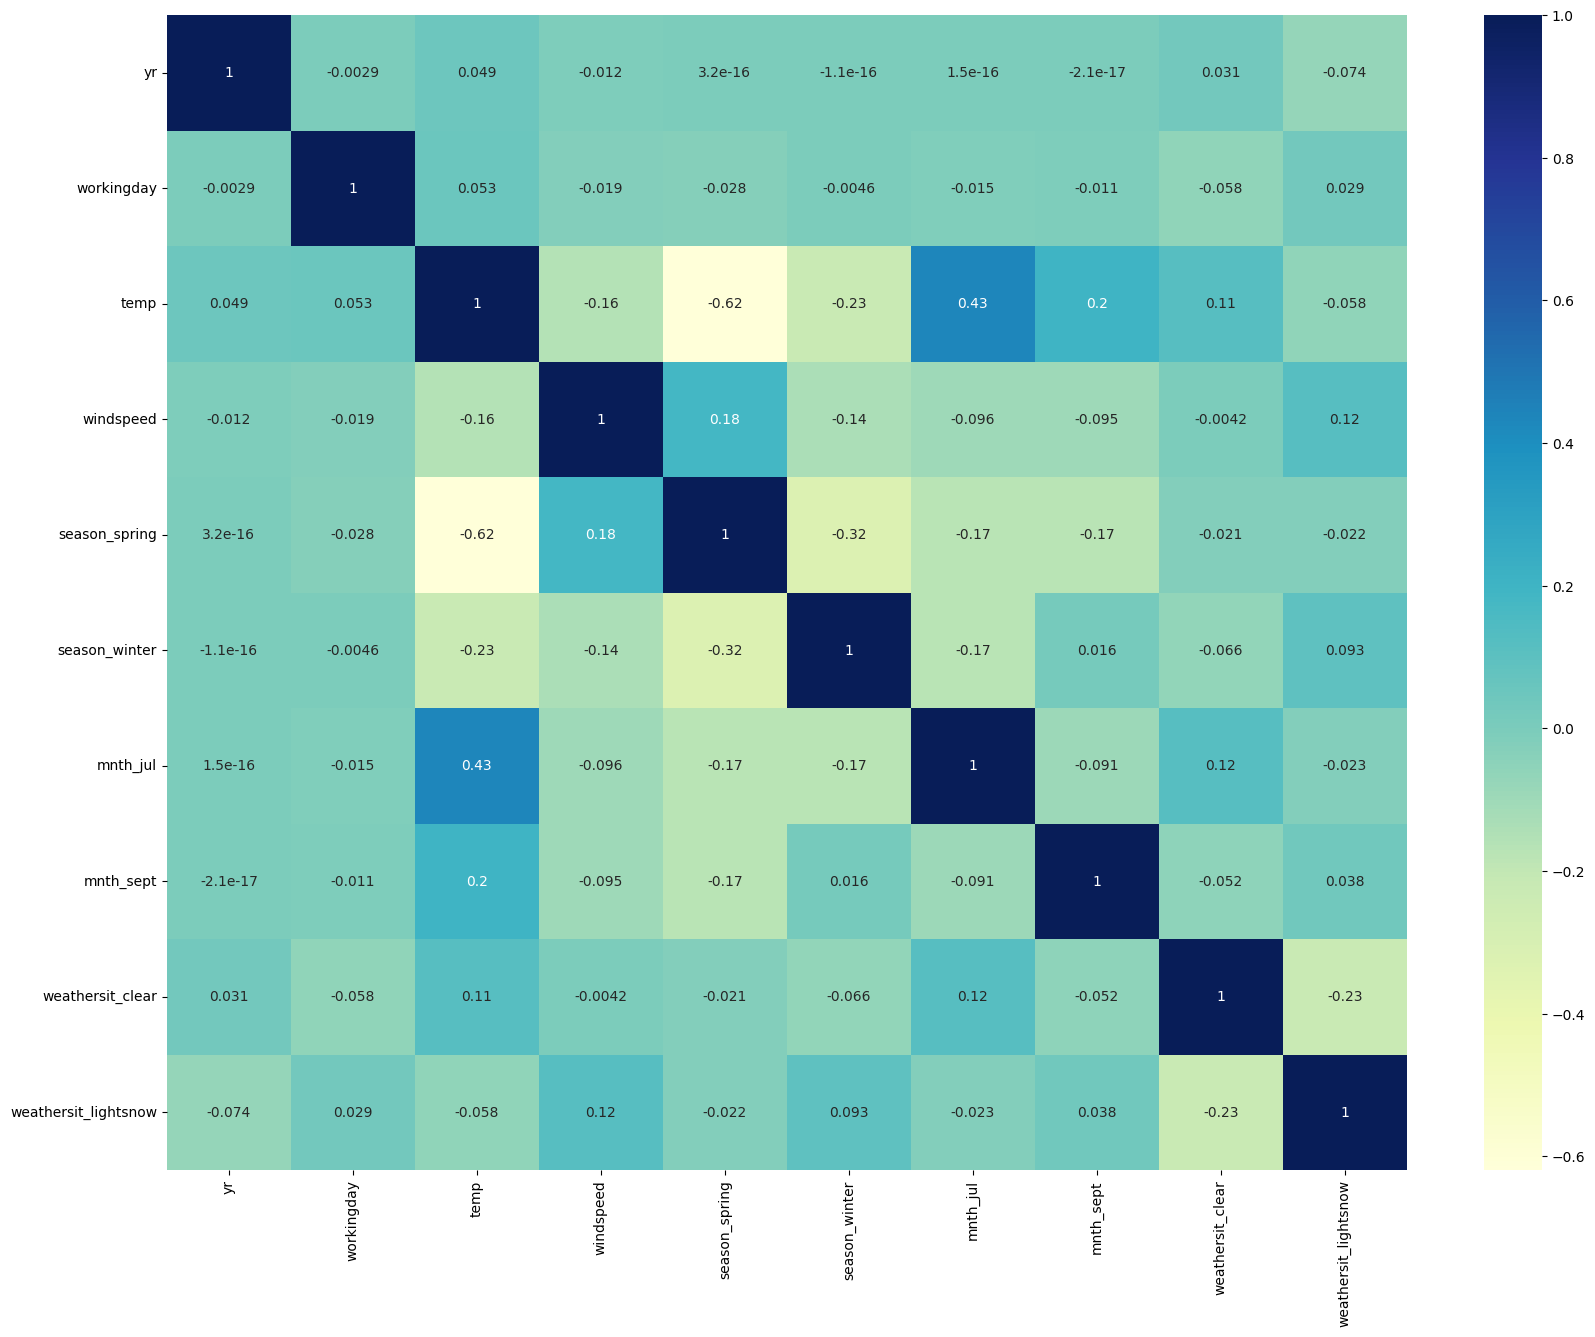

In [349]:
  # Let us see correlation between different variables to avoid overfit
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept', 'weathersit_clear',
       'weathersit_lightsnow']



plt.figure(figsize=(20, 15))
sns.heatmap(bikeshare_df[cols].corr(), cmap='YlGnBu', annot=True)
plt.show()

#### **6.5.6 Model 6**

In [350]:
# temp and mnth_jul has high correlation with each other almost close to 1 i.e.,0.43. since month_jul has lesser coefficient than that of season_winter, lets's remove month_jul

cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_sept', 'weathersit_clear',
       'weathersit_lightsnow']

model6 = build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     261.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          6.87e-183
Time:                        15:06:45   Log-Likelihood:                 482.90
No. Observations:                 510   AIC:                            -945.8
Df Residuals:                     500   BIC:                            -903.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1708 

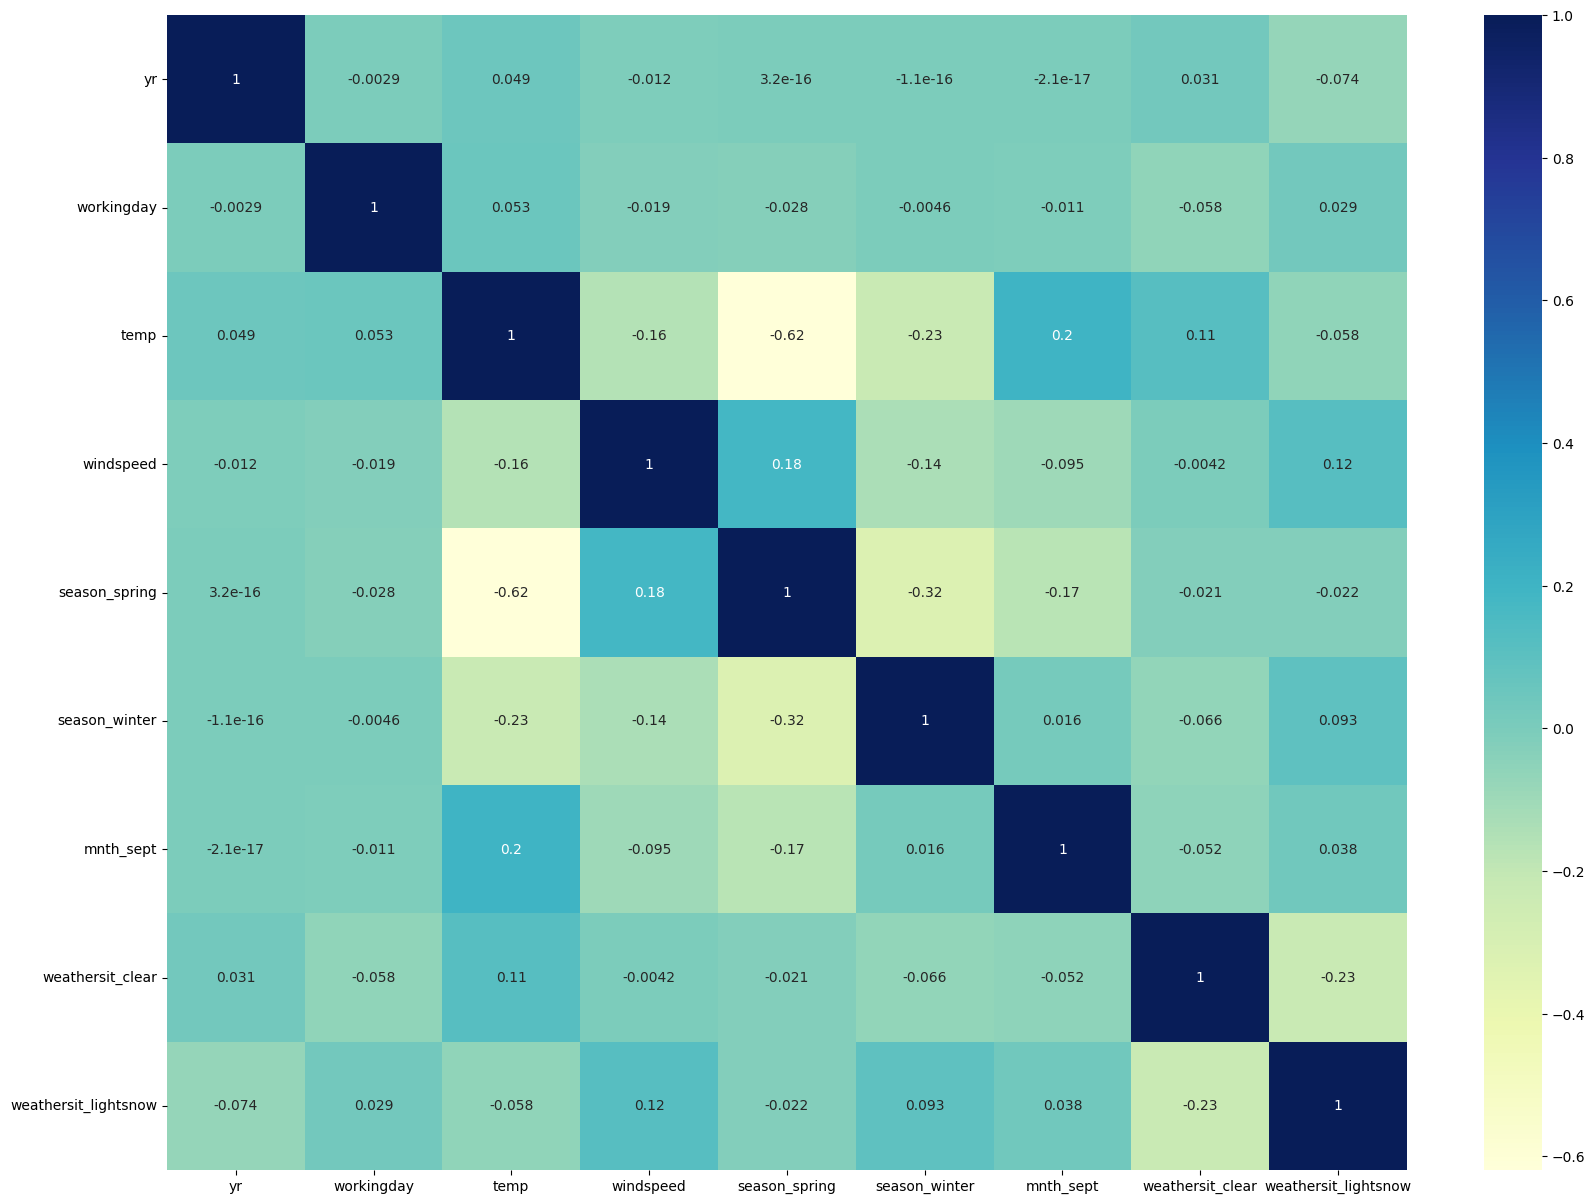

In [351]:
  # Let us see correlation between different variables to avoid overfit
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_winter', 'mnth_sept', 'weathersit_clear',
       'weathersit_lightsnow']



plt.figure(figsize=(20, 15))
sns.heatmap(bikeshare_df[cols].corr(), cmap='YlGnBu', annot=True)
plt.show()

#### **6.5.7 Model 7**

In [352]:
# Removing windspeed because because windspeed and season_spring has high

cols = ['yr', 'workingday', 'temp',
       'season_spring', 'season_winter', 'mnth_sept', 'weathersit_clear',
       'weathersit_lightsnow']

model7 = build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     276.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.37e-178
Time:                        15:06:45   Log-Likelihood:                 469.30
No. Observations:                 510   AIC:                            -920.6
Df Residuals:                     501   BIC:                            -882.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1141 

##### **Model Summary:**
Let us select Model 7 as our final model because of following reasons

**R-squared:** 0.815 (The model explains 81.5% of the variance in the target variable, which is a good level of fit.)

**Adjusted R-squared:** 0.812 (Adjusted for the number of predictors; the drop is minimal, showing that the added predictors are relevant.)

**VIF (Variance Inflation Factor):**
The VIF values for all features are low, indicating no multicollinearity issues.

  temp (3.36):Highest VIF but still within acceptable limits. Other VIF values are below 2.75, showing no problematic correlations between features.

In [353]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [354]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'workingday', 'temp',
       'season_spring', 'season_winter', 'mnth_sept', 'weathersit_clear',
       'weathersit_lightsnow']


#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.1141262750065481 [ 0.23394787  0.02577818  0.42911102 -0.11746315  0.05525227  0.07330483
  0.07679122 -0.22351211]


### **Step 7. Model Evaluation**

#### **7.1 Residual Analysis**

##### **7.1.1 Distribution of Error Terms**

In [355]:
y_train_pred = lr.predict(X_train[cols])

In [356]:
# Plot histogram of error terms
def plot_hist(act, pred):
  sns.distplot(act-pred)
  plt.title('Error Terms')
  plt.xlabel('Errors')
  plt.show()

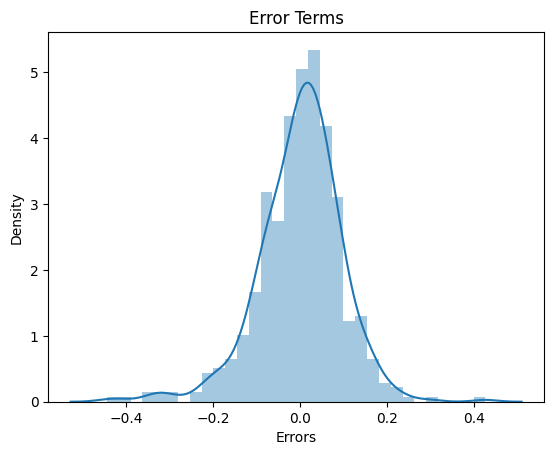

In [357]:
plot_hist(y_train, y_train_pred)

**Observation:**

Errors are normally distribured here with mean 0. So everything seems to be fine

##### **7.1.2 Checking for the pattern of Actual and Predicted Values**

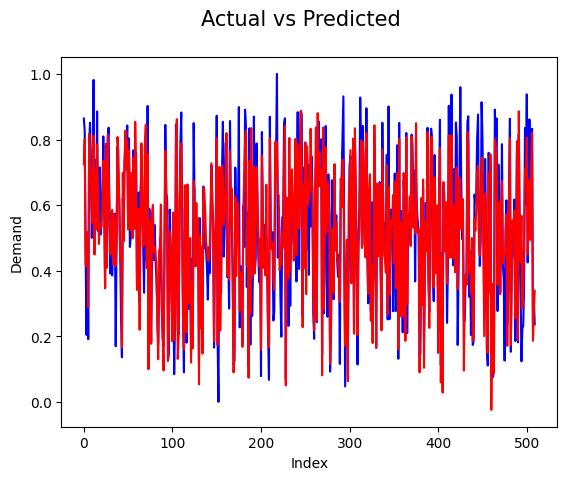

In [358]:
xtrain = [i for i in range(0, len(X_train), 1)]
plt.plot(xtrain, y_train, color="blue")
plt.plot(xtrain, y_train_pred, color="red")
plt.suptitle("Actual vs Predicted", fontsize = 15)
plt.xlabel("Index")
plt.ylabel("Demand")
plt.show()

**Observation:**

Actual and Predicted result both are following almost the same pattern so this model seems ok

##### **7.1.3 Visualizing Error Terms**

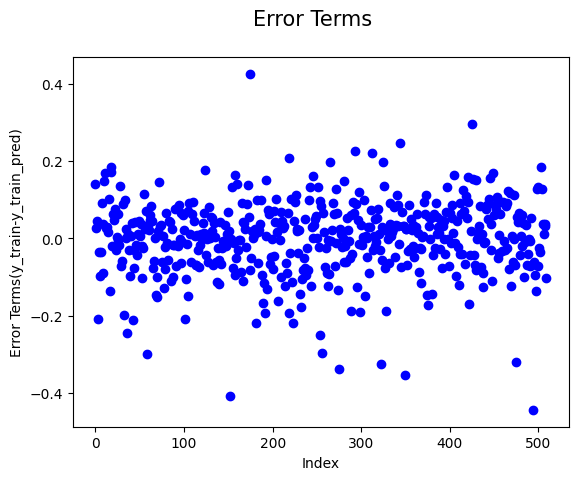

In [359]:
xtrain = [i for i in range(0, len(X_train), 1)]
plt.plot(xtrain, y_train-y_train_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
plt.suptitle("Error Terms", fontsize = 15)
plt.xlabel("Index")
plt.ylabel("Error Terms(y_train-y_train_pred)")
plt.show()

**Observation:**

Error Terms are independent of each other if we see above plot

#### **7.2 R2_Score**

In [360]:
# Printing r2_score
r2_score(y_train,y_train_pred)

0.8153657274956989

**Observation:**

R2 Same as we obtained for our final model

#### **7.3 Homoscedasticity**

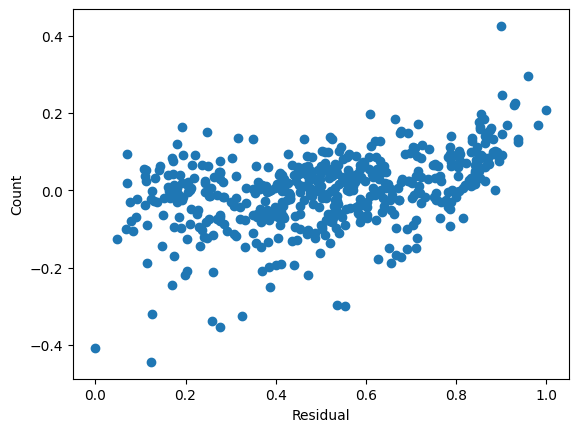

In [361]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train, residual)
plt.ylabel("Count")
plt.xlabel("Residual")
plt.show()

**Observation:**

There is no visible pattern in error terms

**Independence of Residuals:**
Durbin-Watson is 2.02 for our final model i.e., model8. So, there is no auto correlation

#### **7.4 Linearity**

**Partial Regression:**
Partial regression plots help visualize the relationship between each predictor and the target variable after accounting for the effect of other predictors.
This can highlight whether any predictor has a non-linear relationship with the target variable.


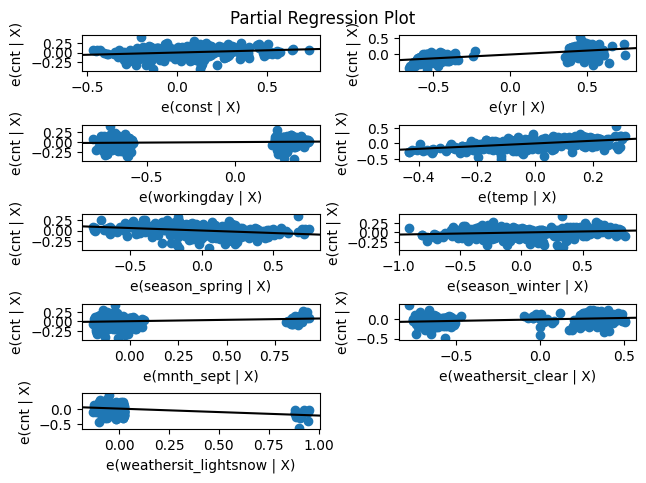

In [362]:
# Use Partial regression plots to see linearity
fig = sm.graphics.plot_partregress_grid(model7)
fig.tight_layout(pad=0.5)
plt.show()

**Observation:**

Linearity can be observed from above visualizations in the model8 which is our final model

### **Step 8. Making Predictions Using the Final Model on Test Data and Evaluation on Test Data**

In [363]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed', 'cnt']

#Test data to be transformed only, no fitting
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [364]:
print(df_test.shape)

(219, 31)


In [365]:
# Splitting into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [366]:
#Columns from our final model
cols = ['yr', 'workingday', 'temp',
       'season_spring', 'season_winter', 'mnth_sept', 'weathersit_clear',
       'weathersit_lightsnow']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

#### **8.1 R-Squared value for test predictions**

In [367]:
# Find out the R squared value between test and predicted test data sets.
r2 = r2_score(y_test,y_test_pred)
print(r2)

0.8073753566879309


**Observation:**

The difference between the train R-squared (81.5%) and the test R-squared (80.5%) is quite small (just 1%). This small gap indicates that the model is generalizing well to unseen data. It's not overfitting, as the performance on the training data and test data is nearly the same. Our model seems to be performing well even on unseen data

#### **8.2 Homoscedacity**

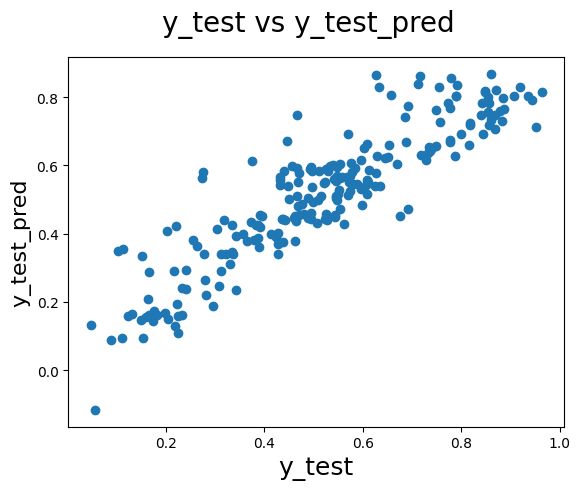

In [368]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)         # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

**Observation:**

We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

#### **8.3 Plot Test vs Predicted test values**

In [369]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

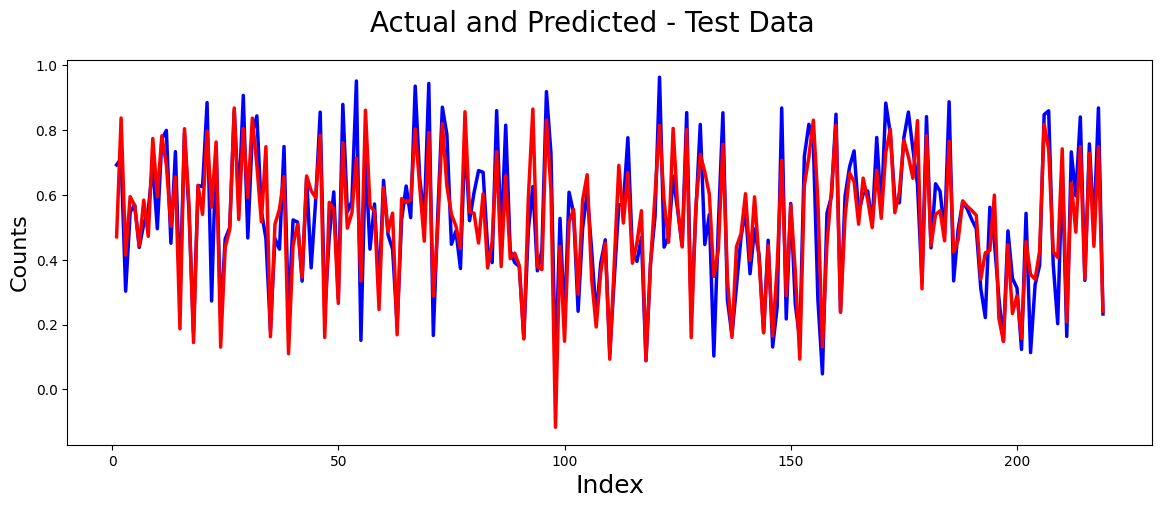

In [370]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

**Observation:**

As we can see predictions for test data is very close to actuals

#### **8.5 Plot Error Terms for Test Data**

In [371]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

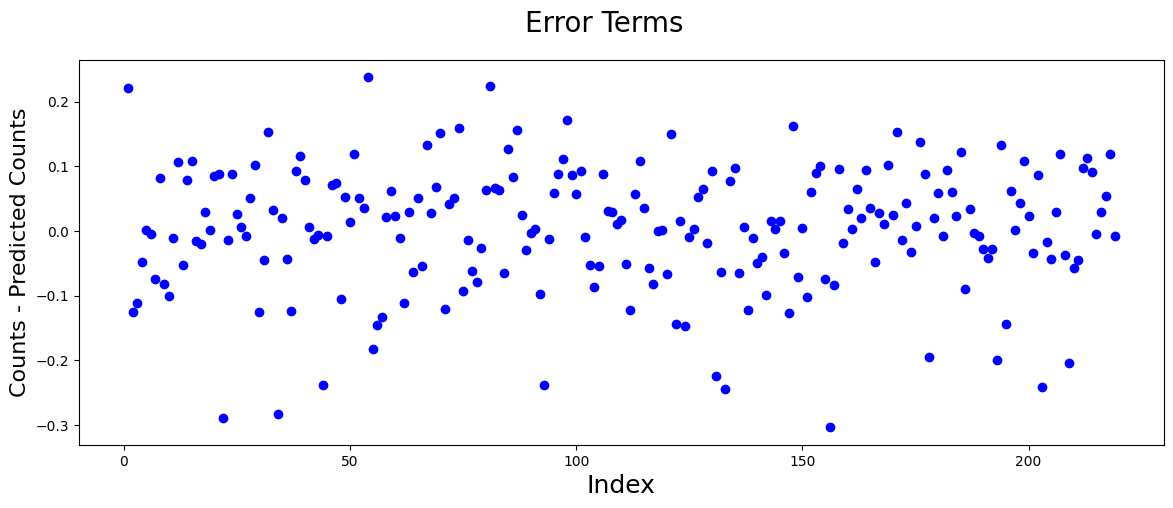

In [372]:
# Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

**Observation:**

We can see that error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

#### **8.6 Distribution of Error Terms**

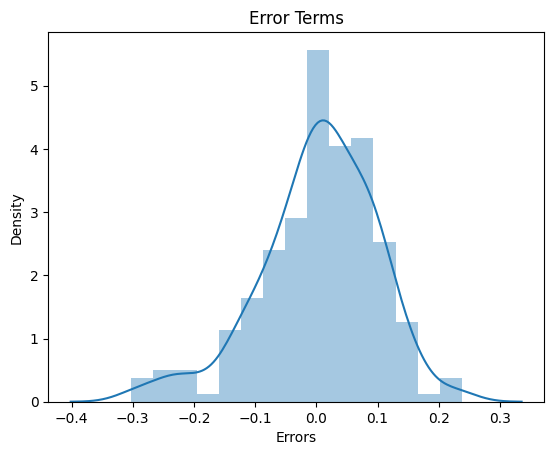

In [373]:
# Using the plot_hist function we have defined earlier while residual analysis on model to see distribution of error terms after prediction on Test Data
plot_hist(y_test, y_test_pred)

**Observation:**

Errors are normally distribured here with mean 0. So everything seems to be fine

### **9 Intrepretting the Model**

Let us go with interpretting our final model

In [374]:
# Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'workingday', 'temp',
       'season_spring', 'season_winter', 'mnth_sept', 'weathersit_clear',
       'weathersit_lightsnow']

model8 = build_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     276.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.37e-178
Time:                        15:06:51   Log-Likelihood:                 469.30
No. Observations:                 510   AIC:                            -920.6
Df Residuals:                     501   BIC:                            -882.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1141 


#### **Analysing the above model, the company should focus on the following features:**

- Positive effects from yr, workingday, temp, season_winter, mnth_sept, and weathersit_clear suggest that these factors increase the count.
- Negative effects from season_spring and weathersit_lightsnow indicate that these factors decrease the count.



## **Comparision between Training and Testing dataset:**
- Train dataset R^2          : 0.815
- Test dataset R^2           : 0.807

 When comparing the R-squared values of 0.801 for the test data and 0.815 for the training set, here's what it means:

**1. R-squared for Train Set (0.815):**

This means that 81.5% of the variance in the dependent variable (e.g., cnt) is explained by the model on the training data.
Since this R-squared is for the training data, it reflects how well the model fits the data it was trained on.

**2. R-squared for Test Set (0.807):**
This indicates that 80.7% of the variance in the dependent variable is explained by the model on the unseen test data.
Test data results are crucial because they indicate how well the model generalizes to new, unseen data.


#### **Interpretation:**


**Good Generalization:** The R-squared values for both the training set (0.815) and test set (0.801) are very close. This is a sign that the model generalizes well to unseen data. The model isn't just performing well on the data it was trained on, but also on the new data.

**Minimal Overfitting:** The small difference (0.815 - 0.807 = 0.008 or 0.8%) between the training and test R-squared values suggests that the model isn't overfitting the training data. It means the model captures the underlying patterns without memorizing the noise in the training set.

#### **Key Takeaways:**

**High predictive power:** Both R-squared values are high, indicating that the model explains a large portion of the variance in the target variable.

**Balanced performance:** The small gap between train and test R-squared values suggests the model has a good balance between fitting the training data and generalizing to new data.

### **CONCLUSION**

Demand of bikes depend on year, temp, weather(clear, light snow), season(spring and winter), month(Sept, Mar)

We can see that the equation of our best fitted line is:

# cnt = 0.1141 + 0.2339 x yr + 0.0258 x workingday + 0.4291 x temp − 0.1175  x season_spring + 0.553 x season_winter + 0.0733 x mnth_sept + 0.0768 x weathersit_clear − 0.2235 x weathersit_lightsnow



Overall we have a decent model without overfitting issue, but I also acknowledge that
there could be other factors which might influence the model which were removed during VIF analysis and also multicollinearity analysis like holiday, windspeed, humidity, etc.